In [3]:
import datetime
####### START HERE ############
from data.coledb.coledb import ColeDBInterface
import pandas as pd
date = "2023-11-30"
end_time = "16:00:00"  # 4 pm
datetime_str = f"{date} {end_time}"
dt_object = datetime.datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
formatted_date = dt_object.strftime('%y%b%d').upper()
close_time_unix = int(dt_object.timestamp())
filename = f"/Users/kamyarghiam/Desktop/kalshi_bot/src/data/local/research/bbo_INXZ_and_SPY_{date}.csv"
from data.coledb.coledb import ColeDBInterface
db = ColeDBInterface()
cole_db_path = db.cole_db_storage_path / f"INXZ/{formatted_date}"
market_suffix = list(cole_db_path.iterdir())[0].name
price_threshold = float(market_suffix[1:])*10

df = pd.read_csv( "/Users/kamyarghiam/Desktop/kalshi_bot/src/data/local/research/11_30_spy_price_to_kalshi_time.csv")
df['x'] -= price_threshold

import numpy as np
# Curve to be fitted (for ONE dataset)
def func( x_time_tup, x0, c):
    xval = x_time_tup[0]
    time = x_time_tup[1]
    return (np.tanh( c * ( xval - x0 ) * time) + 1)*50
df['time'] = (df.time - df.time.min())

In [35]:
# from scipy.optimize import curve_fit
# p0 = [ 0, 0.001]
# start = -100000
# end = -1

# params, cv = curve_fit( func, (df.x.iloc[start:end], df.time.iloc[start:end]), df.y.iloc[start:end],p0=p0)
# params

array([-1.70388267e+01,  3.99278051e-07])

In [5]:
from scipy.optimize import curve_fit

shift = 62
df["x_shift"] = df.x.shift(shift)
new_df = df.dropna()
p0 = [ 0, 0.001]
params, cv = curve_fit( func, (new_df.x_shift, new_df.time), new_df.y,p0=p0)
df['pred'] = func((new_df.x_shift, new_df.time), *params)

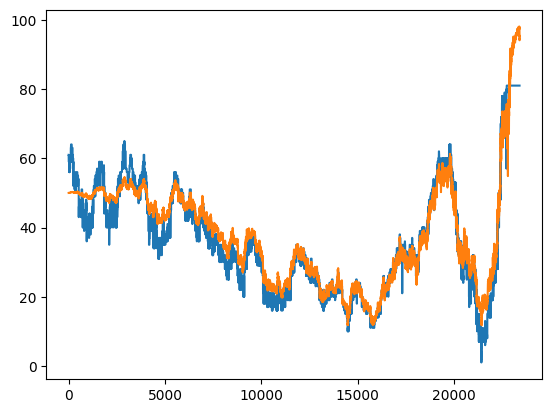

In [6]:
import matplotlib.pyplot as plt 

plt.plot(df.time, df.y)
plt.plot(df.time, df.pred)
plt.show()

In [7]:
params

array([-1.73003590e+01,  4.50041769e-07])